## Support Vector Machine

In [13]:
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt 

In [14]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.n_iters = n_iters 
        self.w = None
        self.b = None
    
    def fit(self, x_in, y_in):
        '''  stochastic Gradient Descent '''

        _, n_feats = x_in.shape
        # By convention the two classes are +1 and -1
        y = np.where(y_in <= 0, -1, 1)
        self.w = np.zeros(n_feats) # Weights for each feature
        self.b = 0

        for _ in range(self.n_iters):       # Iterates a defined number of times
            for idx, xi in enumerate(x_in): # Iterates over each Data point
                ''' 
                y[idx] = +1 or -1
                np.dot(x1,w) - b = signed distance of point from decision boundary (prediction)
                y[idx] * np.dot(xi,w) - b = ensures sign of
                if calculated == actual: condition = +ve -> correctly classified
                else:                    condition = -ve -> misclassified
                '''
                condition = y[idx] * (np.dot(xi, self.w) - self.b) >= 1

                # Correct Classified: Small update in weights to prevent overfitting
                if condition: self.w -= self.learning_rate * (2*self.lambda_ * self.w)
                # Misclassified: Larger update to move boundary, according to gradient
                else: # Bias only updated on misclassification
                    self.w -= self.learning_rate * (2 * self.lambda_ - np.dot(xi, y[idx]))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, x):
        predictions = np.dot(x, self.w) - self.b 
        return np.sign(predictions)

### Generating Dataset using sklearn

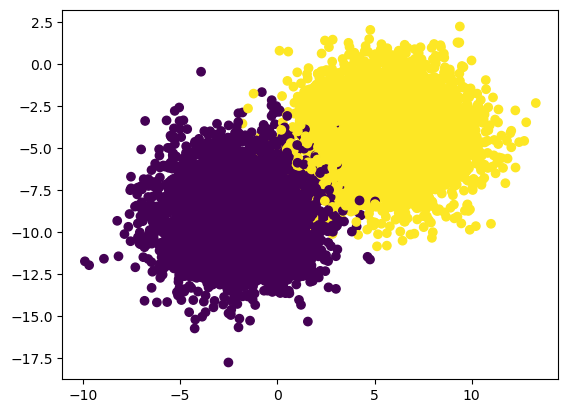

In [15]:
x, y = datasets.make_blobs( n_samples=10000, n_features=2,
      centers=2, cluster_std=2, random_state=40)
y = np.where(y == 0, -1, 1)
plt.scatter(x[:,0],x[:,1],c=y)

In [16]:
def train_test_split(x,y,ratio=0.8):
    x_test, y_test = x[int(ratio*len(x)):], y[int(ratio*len(y)):]
    x, y = x[:int(ratio*len(x))], y[:int(ratio*len(y))]
    return x, y, x_test, y_test

x, y, x_test, y_test = train_test_split(x,y)
print(f"Train Data: {len(x)}, Test Data: {len(x_test)}")

Train Data: 8000, Test Data: 2000


### Running Model

In [17]:
model = SVM()
model.fit(x, y)

In [18]:
def accuracy(y_pred, y_true):
    return np.sum(y_pred == y_true)/len(y_true)    

y_pred = model.predict(x_test)
print("Train Accuracy: ", accuracy(y, model.predict(x)))
print("Test Accuracy: ", accuracy(y_test, y_pred))

Train Accuracy:  0.986
Test Accuracy:  0.9895


### Visualization

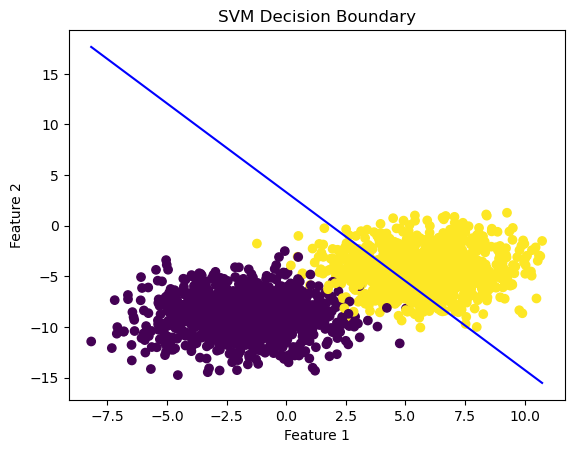

In [21]:
plot_x = np.array([min(x_test[:, 0]), max(x_test[:, 0])])
plot_y = (-1. / model.w[1]) * (model.w[0] * plot_x + model.b)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.plot(plot_x, plot_y, c="b")
plt.title("SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()